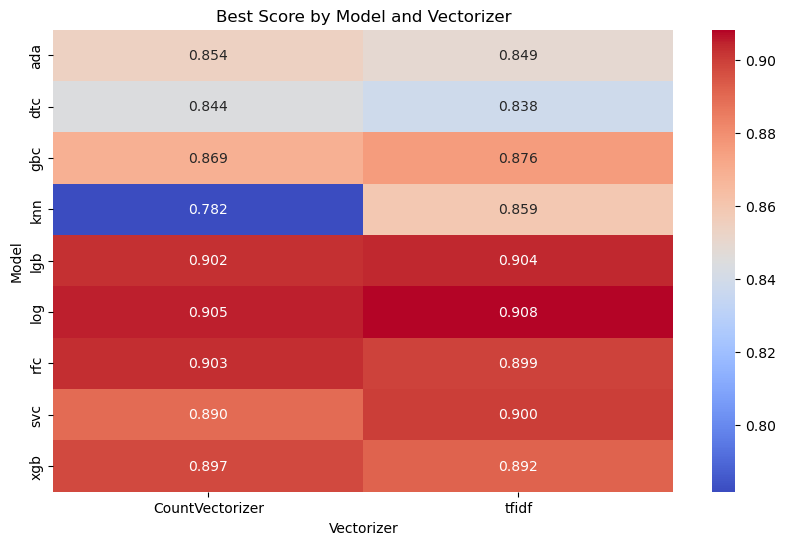

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 示例数据
data = {
    'name': ['knn', 'log', 'dtc', 'rfc', 'svc', 'ada', 'gbc', 'xgb', 'lgb',
             'knn', 'log', 'dtc', 'rfc', 'svc', 'ada', 'gbc', 'xgb', 'lgb'],
    'best_score': [0.859167, 0.908333, 0.838333, 0.899167, 0.9, 0.849167, 0.875833, 0.891667, 0.904167,
                    0.781667, 0.905, 0.844167, 0.903333, 0.89, 0.854167, 0.869167, 0.8975, 0.9025],
    'train_time': [0.001833, 0.0605, 0.1215, 0.282, 0.8985, 4.371, 8.653, 0.245667, 0.012333,
                   0.0, 0.100333, 0.103333, 0.572667, 0.815833, 4.356833, 8.439667, 0.096, 0.0085],
    'vectorizer': ['tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf',
                   'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer',
                   'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer']
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 创建一个透视表，用于存储不同模型在不同向量化器下的最佳得分
pivot_table = df.pivot_table(values='best_score', index='name', columns='vectorizer')

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Best Score by Model and Vectorizer')
plt.xlabel('Vectorizer')
plt.ylabel('Model')
plt.savefig('./images/Best_Score_by_Model_and_Vectorizer.png')
plt.show()

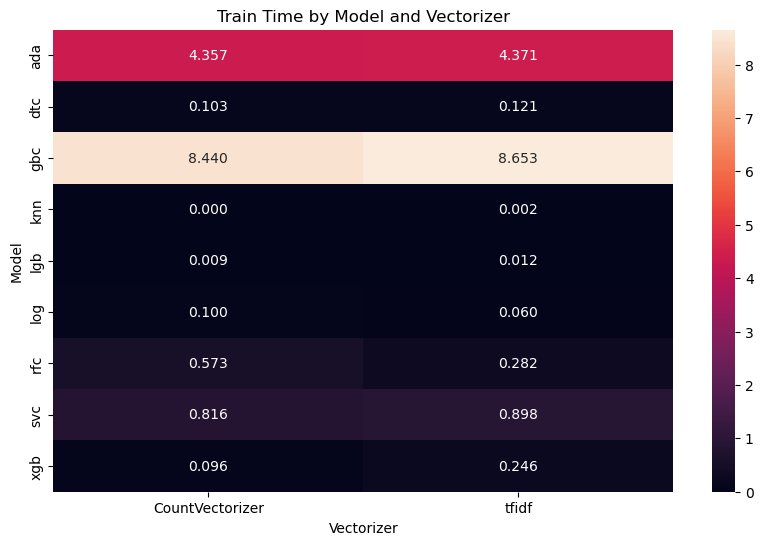

In [6]:
# 创建一个透视表，用于存储不同模型在不同向量化器下的最佳得分
pivot_table = df.pivot_table(values='train_time', index='name', columns='vectorizer')

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', annot_kws={'horizontalalignment': 'center'})
plt.title('Train Time by Model and Vectorizer')
plt.xlabel('Vectorizer')
plt.ylabel('Model')
plt.savefig('./images/Train_Time_by_Model_and_Vectorizer.png')
plt.show()

In [3]:
import matplotlib
print("Matplotlib 版本:", matplotlib.__version__)
print("Seaborn 版本:", sns.__version__)

Matplotlib 版本: 3.8.0
Seaborn 版本: 0.13.2


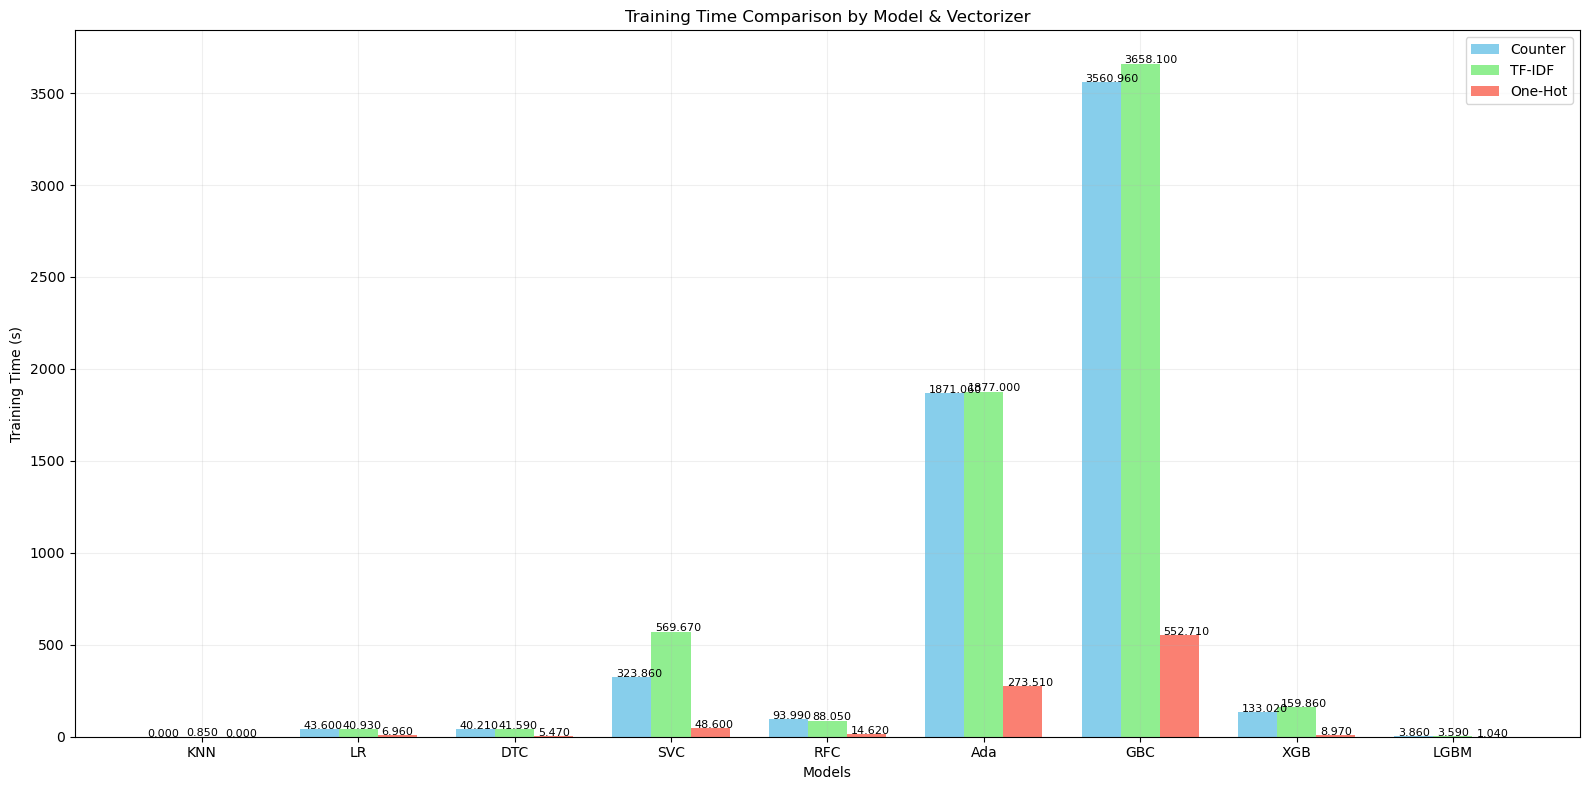

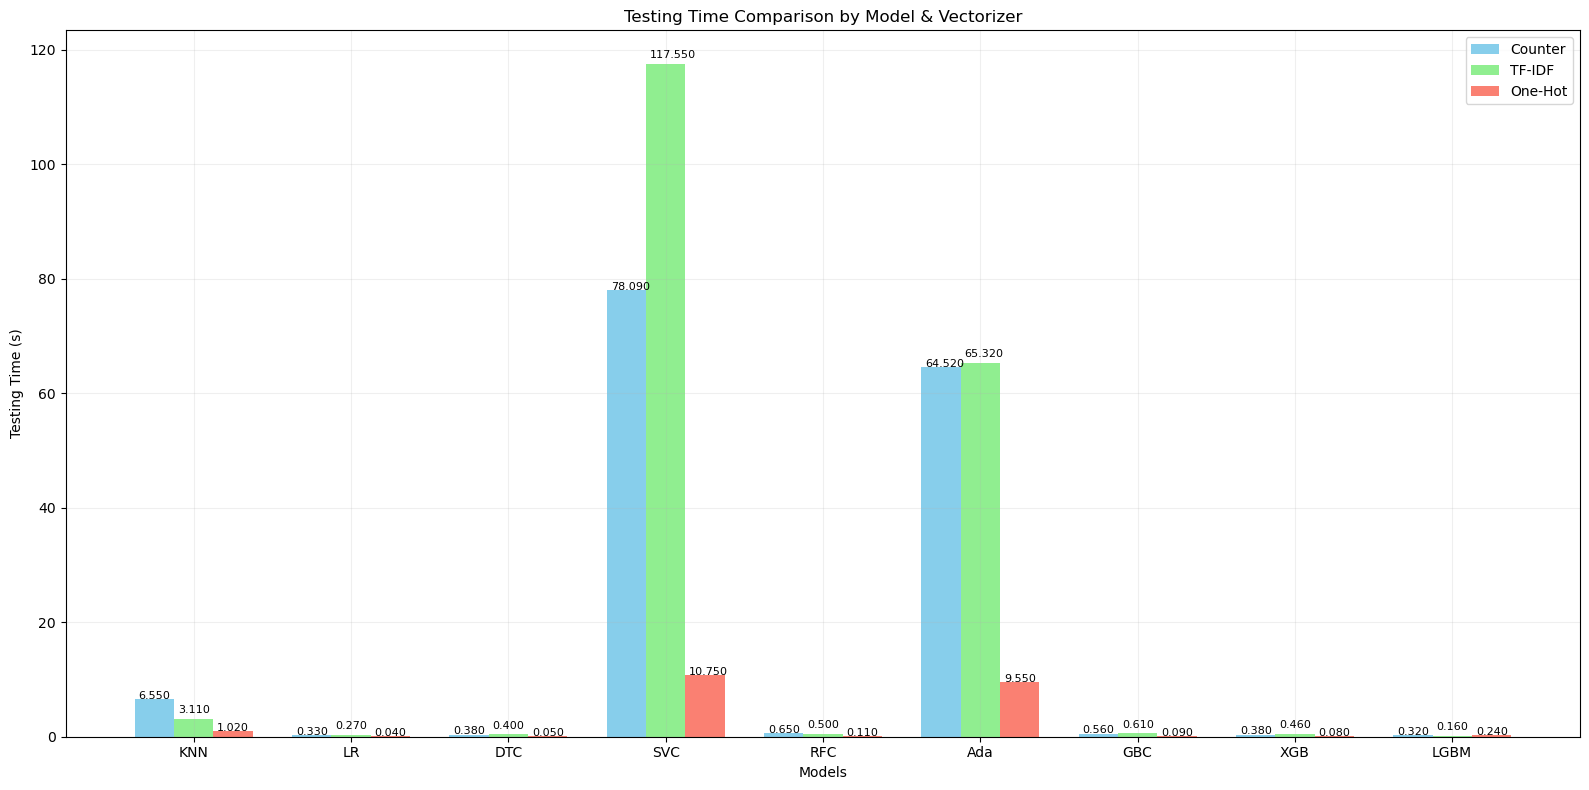

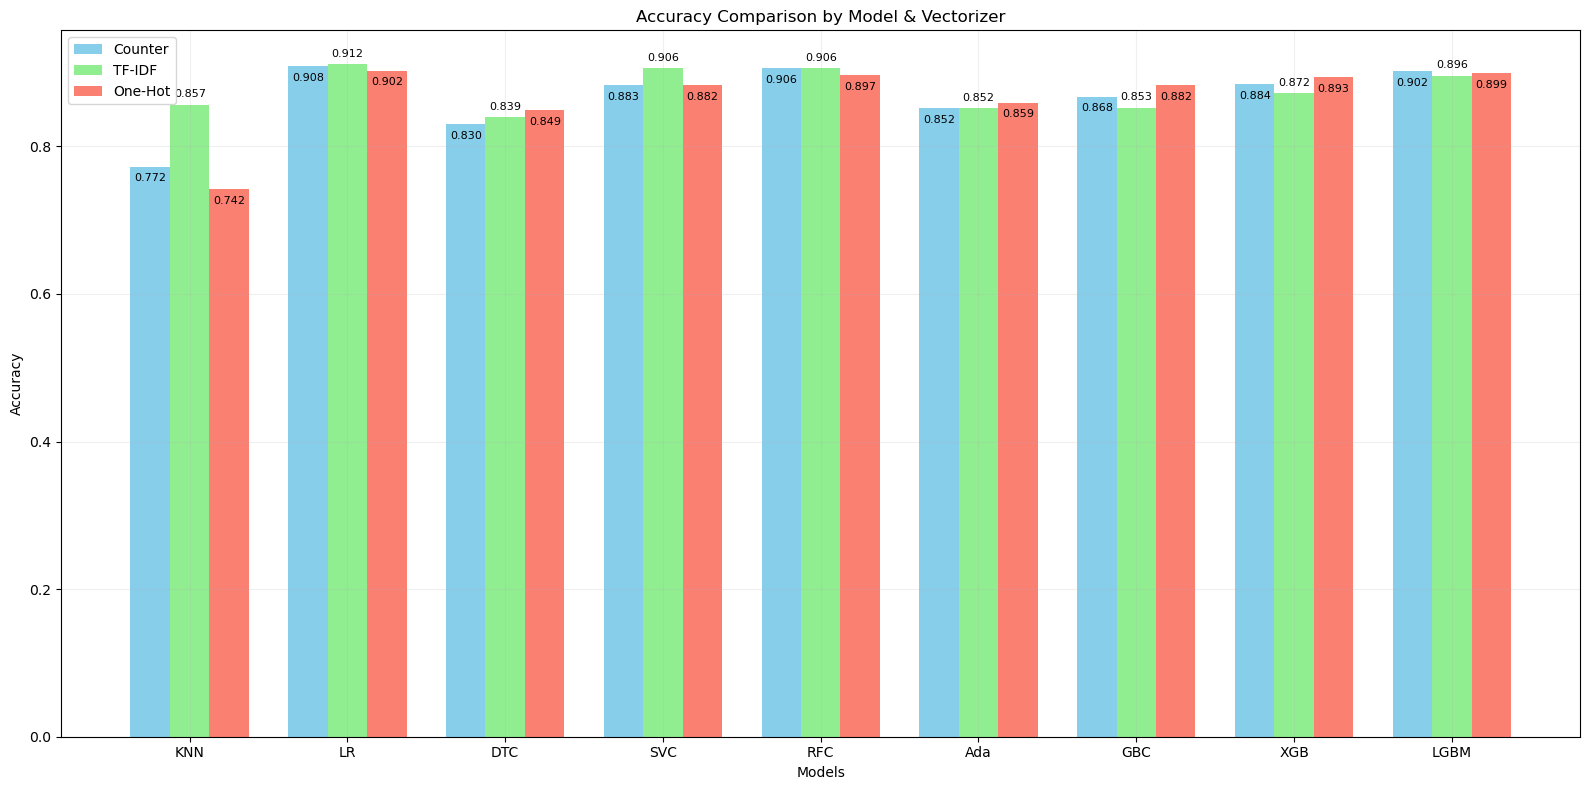

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名称和指标数据
models = ["KNN", "LR", "DTC", "SVC", "RFC", "Ada", "GBC", "XGB", "LGBM"]

# 训练时间数据
train_times_counter = [0.0, 43.6, 40.21, 323.86, 93.99, 1871.06, 3560.96, 133.02, 3.86]
train_times_tfidf = [0.85, 40.93, 41.59, 569.67, 88.05, 1877.0, 3658.1, 159.86, 3.59]
train_times_onehot = [0.0, 6.96, 5.47, 48.6, 14.62, 273.51, 552.71, 8.97, 1.04]

# 测试时间数据
test_times_counter = [6.55, 0.33, 0.38, 78.09, 0.65, 64.52, 0.56, 0.38, 0.32]
test_times_tfidf = [3.11, 0.27, 0.4, 117.55, 0.5, 65.32, 0.61, 0.46, 0.16]
test_times_onehot = [1.02, 0.04, 0.05, 10.75, 0.11, 9.55, 0.09, 0.08, 0.24]

# 准确率数据
accuracies_counter = [0.7725, 0.9083333333333333, 0.83, 0.8833333333333333, 0.9058333333333334, 
                      0.8516666666666667, 0.8675, 0.8841666666666667, 0.9016666666666666]
accuracies_tfidf = [0.8566666666666667, 0.9116666666666666, 0.8391666666666666, 0.9058333333333334, 
                    0.9058333333333334, 0.8516666666666667, 0.8525, 0.8716666666666667, 0.8958333333333334]
accuracies_onehot = [0.7416666666666667, 0.9025, 0.8491666666666666, 0.8825, 0.8966666666666666, 
                      0.8591666666666666, 0.8825, 0.8933333333333333, 0.8991666666666667]

# 设置柱状图的宽度
bar_width = 0.25

# 计算每个柱状图的位置
index = np.arange(len(models))

# 绘制训练时间对比图
plt.figure(figsize=(16, 8))
plt.bar(index - bar_width, train_times_counter, bar_width, color='skyblue', label='Counter')
plt.bar(index, train_times_tfidf, bar_width, color='lightgreen', label='TF-IDF')
plt.bar(index + bar_width, train_times_onehot, bar_width, color='salmon', label='One-Hot')

# 添加柱子上的数值
for i in range(len(models)):
    plt.text(index[i] - bar_width - 0.1, train_times_counter[i] + 0.01, f'{train_times_counter[i]:.3f}', fontsize=8)
    plt.text(index[i] - 0.1, train_times_tfidf[i] + 3, f'{train_times_tfidf[i]:.3f}', fontsize=8)
    plt.text(index[i] + bar_width - 0.1, train_times_onehot[i] + 0.01, f'{train_times_onehot[i]:.3f}', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison by Model & Vectorizer')
plt.xticks(index, models, rotation=0)
plt.legend()
plt.grid(True, alpha=0.2)
plt.autoscale(enable=True, axis='y')
plt.tight_layout()
plt.savefig('./images/Training Time Comparison by Model and Vectorizer.png')
plt.show()

# 绘制测试时间对比图
plt.figure(figsize=(16, 8))
plt.bar(index - bar_width, test_times_counter, bar_width, color='skyblue', label='Counter')
plt.bar(index, test_times_tfidf, bar_width, color='lightgreen', label='TF-IDF')
plt.bar(index + bar_width, test_times_onehot, bar_width, color='salmon', label='One-Hot')

# 添加柱子上的数值
for i in range(len(models)):
    plt.text(index[i] - bar_width - 0.1, test_times_counter[i] + 0.01, f'{test_times_counter[i]:.3f}', fontsize=8)
    plt.text(index[i] - 0.1, test_times_tfidf[i] + 1, f'{test_times_tfidf[i]:.3f}', fontsize=8)
    plt.text(index[i] + bar_width - 0.1, test_times_onehot[i] + 0.01, f'{test_times_onehot[i]:.3f}', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Testing Time (s)')
plt.title('Testing Time Comparison by Model & Vectorizer')
plt.xticks(index, models, rotation=0)
plt.legend()
plt.grid(True, alpha=0.2)
plt.autoscale(enable=True, axis='y')
plt.tight_layout()
plt.savefig('./images/Testing Time Comparison by Model and Vectorizer.png')
plt.show()

# 绘制准确率对比图
plt.figure(figsize=(16, 8))
plt.bar(index - bar_width, accuracies_counter, bar_width, color='skyblue', label='Counter')
plt.bar(index, accuracies_tfidf, bar_width, color='lightgreen', label='TF-IDF')
plt.bar(index + bar_width, accuracies_onehot, bar_width, color='salmon', label='One-Hot')

# 添加柱子上的数值
for i in range(len(models)):
    plt.text(index[i] - bar_width - 0.1, accuracies_counter[i] - 0.02, f'{accuracies_counter[i]:.3f}', fontsize=8)
    plt.text(index[i] - 0.1, accuracies_tfidf[i] + 0.01, f'{accuracies_tfidf[i]:.3f}', fontsize=8)
    plt.text(index[i] + bar_width - 0.1, accuracies_onehot[i] - 0.02, f'{accuracies_onehot[i]:.3f}', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Model & Vectorizer')
plt.xticks(index, models, rotation=0)
plt.legend()
plt.grid(True, alpha=0.2)
plt.autoscale(enable=True, axis='y')
plt.tight_layout()
plt.savefig('./images/Accuracy Comparison by Model and Vectorizer.png')
plt.show()


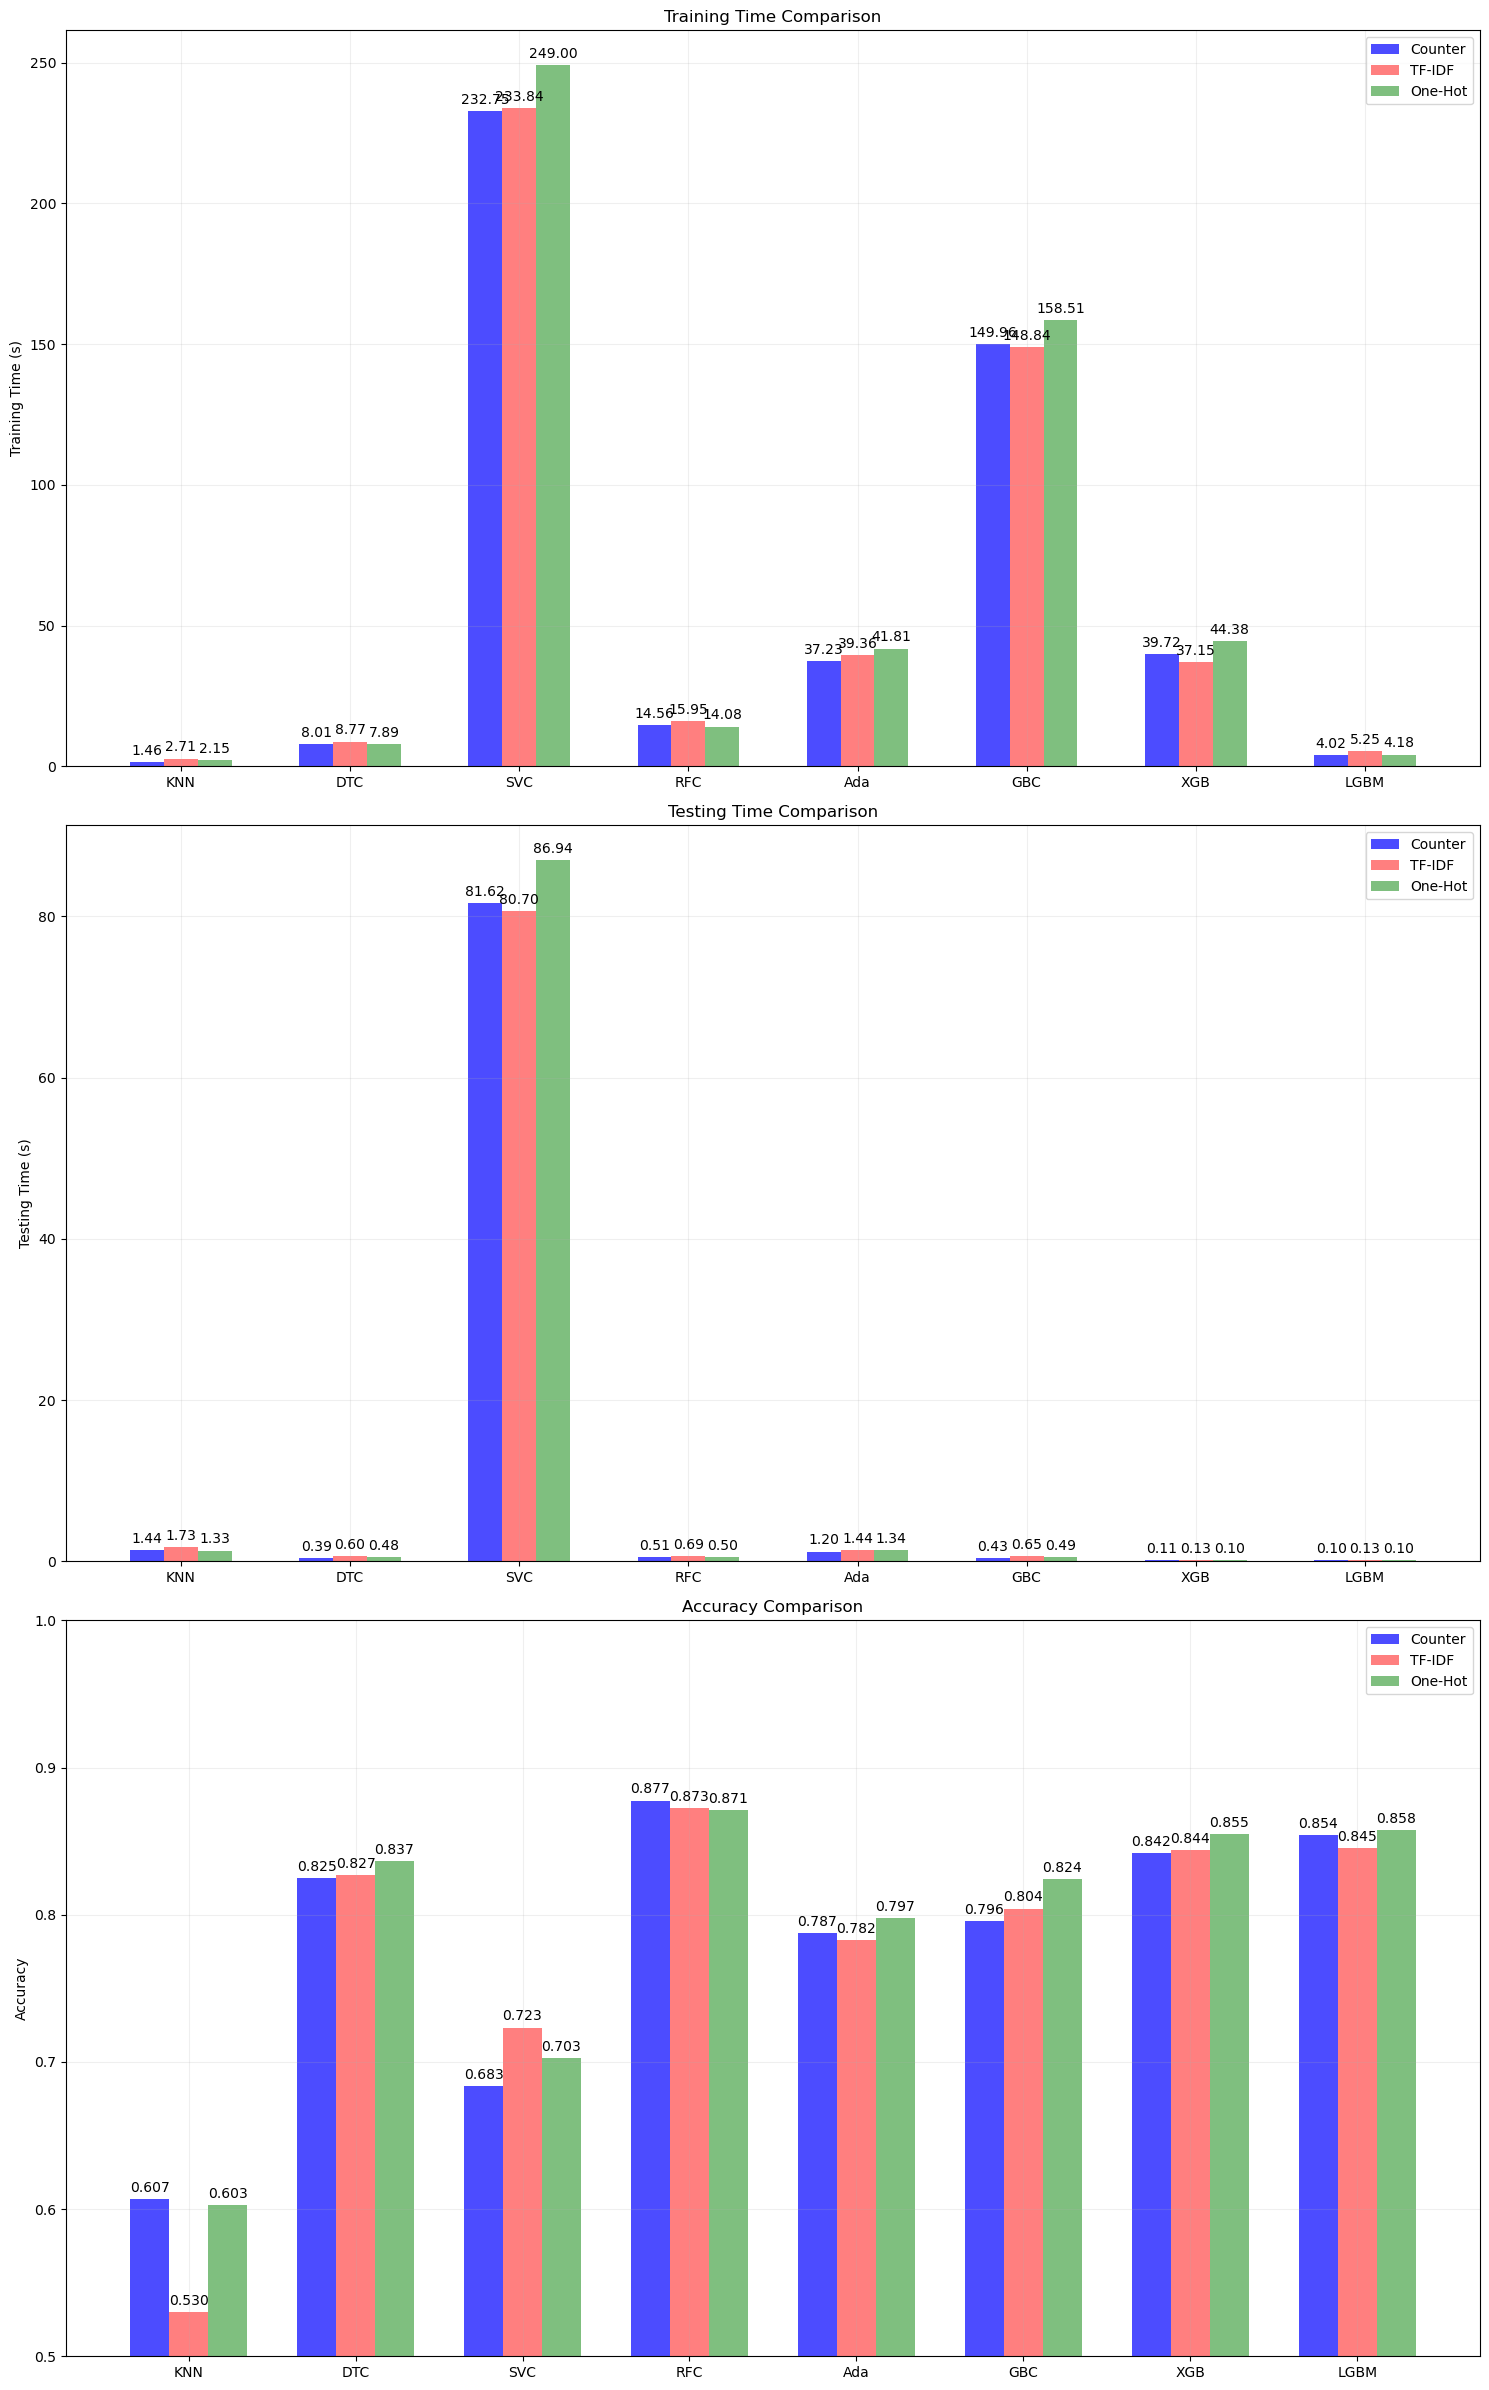

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "KNN", "DTC", "SVC",
    "RFC", "Ada", "GBC",
    "XGB", "LGBM"
]

sample_counts = [4799] * 8  # Sample Counts
train_times_counter = [1.46, 8.01, 232.75, 14.56, 37.23, 149.96, 39.72, 4.02]  # Training Time (Counter)
train_times_tfidf = [2.71, 8.77, 233.84, 15.95, 39.36, 148.84, 37.15, 5.25]  # Training Time (TF-IDF)
train_times_onehot = [2.15, 7.89, 249.0, 14.08, 41.81, 158.51, 44.38, 4.18]  # Training Time (One-Hot)

test_times_counter = [1.44, 0.39, 81.62, 0.51, 1.2, 0.43, 0.11, 0.1]  # Testing Time (Counter)
test_times_tfidf = [1.73, 0.6, 80.7, 0.69, 1.44, 0.65, 0.13, 0.13]  # Testing Time (TF-IDF)
test_times_onehot = [1.33, 0.48, 86.94, 0.5, 1.34, 0.49, 0.1, 0.1]  # Testing Time (One-Hot)

accuracies_counter = [0.6066666666666667, 0.825, 0.6833333333333333, 0.8775, 0.7875, 0.7958333333333333, 0.8416666666666667, 0.8541666666666666]  # Accuracy (Counter)
accuracies_tfidf = [0.53, 0.8266666666666667, 0.7233333333333334, 0.8725, 0.7825, 0.8041666666666667, 0.8441666666666666, 0.845]  # Accuracy (TF-IDF)
accuracies_onehot = [0.6025, 0.8366666666666667, 0.7025, 0.8708333333333333, 0.7975, 0.8241666666666667, 0.855, 0.8575]  # Accuracy (One-Hot)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(15, 24))

# Training Times
x = np.arange(len(models)) * 4
width = 0.8
bar11 = axs[0].bar(x - width, train_times_counter, color='b', alpha=0.7, label='Counter')
bar12 = axs[0].bar(x, train_times_tfidf, color='r', alpha=0.5, label='TF-IDF')
bar13 = axs[0].bar(x + width, train_times_onehot, color='g', alpha=0.5, label='One-Hot')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, rotation=0)
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Time Comparison')
axs[0].legend()
axs[0].grid(True, alpha=0.2)

axs[0].bar_label(bar11, fmt='%0.2f', padding=3)
axs[0].bar_label(bar12, fmt='%0.2f', padding=3)
axs[0].bar_label(bar13, fmt='%0.2f', padding=3)

# Testing Times
bar21 = axs[1].bar(x - width, test_times_counter, color='b', alpha=0.7, label='Counter')
bar22 = axs[1].bar(x, test_times_tfidf, color='r', alpha=0.5, label='TF-IDF')
bar23 = axs[1].bar(x + width, test_times_onehot, color='g', alpha=0.5, label='One-Hot')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, rotation=0)
axs[1].set_ylabel('Testing Time (s)')
axs[1].set_title('Testing Time Comparison')
axs[1].legend()
axs[1].grid(True, alpha=0.2)

axs[1].bar_label(bar21, fmt='%0.2f', padding=3)
axs[1].bar_label(bar22, fmt='%0.2f', padding=3)
axs[1].bar_label(bar23, fmt='%0.2f', padding=3)


# Accuracies
x = np.arange(len(models)) * 1.5
width = 0.35
bars1 = axs[2].bar(x - width, accuracies_counter, width, color='b', alpha=0.7, label='Counter')
bars2 = axs[2].bar(x, accuracies_tfidf, width, color='r', alpha=0.5, label='TF-IDF')
bars3 = axs[2].bar(x + width, accuracies_onehot, width, color='g', alpha=0.5, label='One-Hot')
axs[2].set_ylim(0.5, 1)
axs[2].set_xticks(x)
axs[2].set_xticklabels(models, rotation=0)
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Accuracy Comparison')
axs[2].legend()
axs[2].grid(True, alpha=0.2)

# Adding accuracy values on top of the bars
axs[2].bar_label(bars1, fmt='%0.3f', padding=3)
axs[2].bar_label(bars2, fmt='%0.3f', padding=3)
axs[2].bar_label(bars3, fmt='%0.3f', padding=3)


# Setting layout
plt.tight_layout()
plt.show()


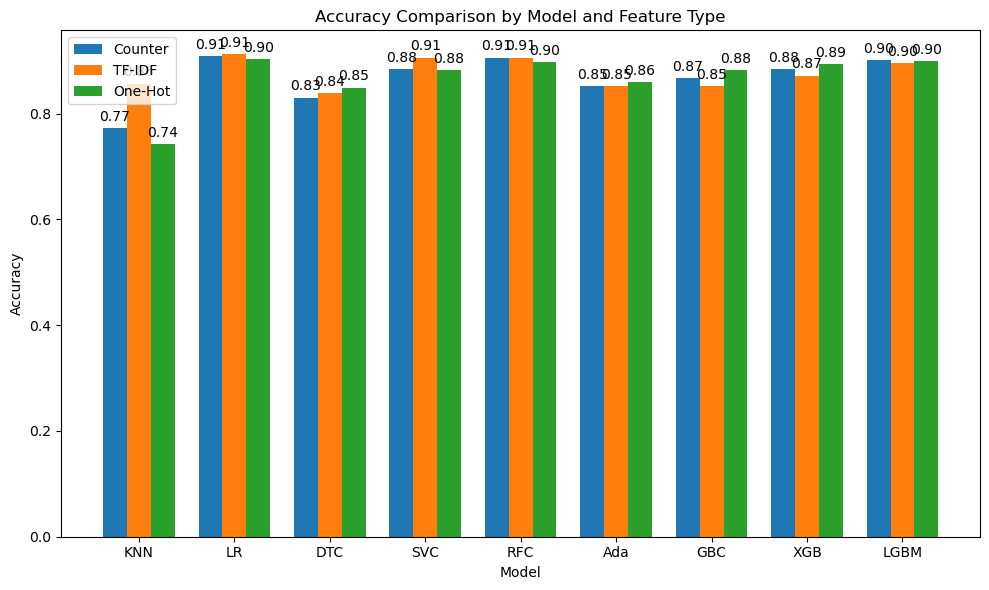

In [114]:
# 模型名称和指标数据
models = ["KNN", "LR", "DTC", "SVC", "RFC", "Ada", "GBC", "XGB", "LGBM"]

# 训练时间数据
train_times_counter = [0.0, 43.6, 40.21, 323.86, 93.99, 1871.06, 3560.96, 133.02, 3.86]
train_times_tfidf = [0.85, 40.93, 41.59, 569.67, 88.05, 1877.0, 3658.1, 159.86, 3.59]
train_times_onehot = [0.0, 6.96, 5.47, 48.6, 14.62, 273.51, 552.71, 8.97, 1.04]

# 测试时间数据
test_times_counter = [6.55, 0.33, 0.38, 78.09, 0.65, 64.52, 0.56, 0.38, 0.32]
test_times_tfidf = [3.11, 0.27, 0.4, 117.55, 0.5, 65.32, 0.61, 0.46, 0.16]
test_times_onehot = [1.02, 0.04, 0.05, 10.75, 0.11, 9.55, 0.09, 0.08, 0.24]

# 准确率数据
accuracies_counter = [0.7725, 0.9083333333333333, 0.83, 0.8833333333333333, 0.9058333333333334, 
                      0.8516666666666667, 0.8675, 0.8841666666666667, 0.9016666666666666]
accuracies_tfidf = [0.8566666666666667, 0.9116666666666666, 0.8391666666666666, 0.9058333333333334, 
                    0.9058333333333334, 0.8516666666666667, 0.8525, 0.8716666666666667, 0.8958333333333334]
accuracies_onehot = [0.7416666666666667, 0.9025, 0.8491666666666666, 0.8825, 0.8966666666666666, 
                      0.8591666666666666, 0.8825, 0.8933333333333333, 0.8991666666666667]


# 设置柱状图的宽度
bar_width = 0.25

# 计算每个柱状图的位置
index = np.arange(len(models))

# 创建画布和子图对象
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱状图
bar1 = plt.bar(index, accuracies_counter, bar_width, label='Counter')
bar2 = plt.bar(index + bar_width, accuracies_tfidf, bar_width, label='TF-IDF')
bar3 = plt.bar(index + 2*bar_width, accuracies_onehot, bar_width, label='One-Hot')

# 添加柱子上的数值
# for i in range(len(models)):
#     plt.text(index[i] - 0.05, accuracies_counter[i] + 0.01, f'{accuracies_counter[i]:.4f}', fontsize=8)
#     plt.text(index[i] + bar_width - 0.05, accuracies_tfidf[i] + 0.01, f'{accuracies_tfidf[i]:.4f}', fontsize=8)
#     plt.text(index[i] + 2*bar_width - 0.05, accuracies_onehot[i] + 0.01, f'{accuracies_onehot[i]:.4f}', fontsize=8)

plt.bar_label(bar1, fmt='%0.2f', padding=3)
plt.bar_label(bar2, fmt='%0.2f', padding=3)
plt.bar_label(bar3, fmt='%0.2f', padding=3)


# 添加其他元素和标签
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Model and Feature Type')
plt.xticks(index + bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()

(KNeighborsClassifier,Counter)(4799), 0.0, 6.55, 0.7725
(LogisticRegression,Counter)(4799), 43.6, 0.33, 0.9083333333333333
(DecisionTreeClassifier,Counter)(4799), 40.21, 0.38, 0.83
(SVC,Counter)(4799), 323.86, 78.09, 0.8833333333333333
(RandomForestClassifier,Counter)(4799), 93.99, 0.65, 0.9058333333333334
(AdaBoostClassifier,Counter)(4799), 1871.06, 64.52, 0.8516666666666667
(GradientBoostingClassifier,Counter)(4799), 3560.96, 0.56, 0.8675
(XGBClassifier,Counter)(4799), 133.02, 0.38, 0.8841666666666667
(LGBMClassifier,Counter)(4799), 3.86, 0.32, 0.9016666666666666
(KNeighborsClassifier,Tfidf)(4799), 0.85, 3.11, 0.8566666666666667
(LogisticRegression,Tfidf)(4799), 40.93, 0.27, 0.9116666666666666
(DecisionTreeClassifier,Tfidf)(4799), 41.59, 0.4, 0.8391666666666666
(SVC,Tfidf)(4799), 569.67, 117.55, 0.9058333333333334
(RandomForestClassifier,Tfidf)(4799), 88.05, 0.5, 0.9058333333333334
(AdaBoostClassifier,Tfidf)(4799), 1877.0, 65.32, 0.8516666666666667
(GradientBoostingClassifier,Tfidf)(4799), 3658.1, 0.61, 0.8525
(XGBClassifier,Tfidf)(4799), 159.86, 0.46, 0.8716666666666667
(LGBMClassifier,Tfidf)(4799), 3.59, 0.16, 0.8958333333333334
(KNeighborsClassifier,OneHot)(4799), 0.0, 1.02, 0.7416666666666667
(LogisticRegression,OneHot)(4799), 6.96, 0.04, 0.9025
(DecisionTreeClassifier,OneHot)(4799), 5.47, 0.05, 0.8491666666666666
(SVC,OneHot)(4799), 48.6, 10.75, 0.8825
(RandomForestClassifier,OneHot)(4799), 14.62, 0.11, 0.8966666666666666
(AdaBoostClassifier,OneHot)(4799), 273.51, 9.55, 0.8591666666666666
(GradientBoostingClassifier,OneHot)(4799), 552.71, 0.09, 0.8825
(XGBClassifier,OneHot)(4799), 8.97, 0.08, 0.8933333333333333
(LGBMClassifier,OneHot)(4799), 1.04, 0.24, 0.8991666666666667

In [91]:
3560.96 / 60 / 60

0.9891555555555556

In [105]:
3658 / 60 

60.96666666666667

In [109]:
274 * 3 / 60

13.7

In [ ]:
import matplotlib.pyplot as plt

# 模型名称和指标数据
models = ["KNN", "Logistic Regression", "Decision Tree", "SVC", "Random Forest", 
          "AdaBoost", "Gradient Boosting", "XGBoost", "LGBM"]
train_times_counter = [0.0, 43.6, 40.21, 323.86, 93.99, 1871.06, 3560.96, 133.02, 3.86]
train_times_tfidf = [0.85, 40.93, 41.59, 569.67, 88.05, 1877.0, 3658.1, 159.86, 3.59]

test_times_counter = [6.55, 0.33, 0.38, 78.09, 0.65, 64.52, 0.56, 0.38, 0.32]
test_times_tfidf = [3.11, 0.27, 0.4, 117.55, 0.5, 65.32, 0.61, 0.46, 0.16]

accuracies_counter = [0.7725, 0.9083333333333333, 0.83, 0.8833333333333333, 0.9058333333333334, 
                      0.8516666666666667, 0.8675, 0.8841666666666667, 0.9016666666666666]
accuracies_tfidf = [0.8566666666666667, 0.9116666666666666, 0.8391666666666666, 0.9058333333333334, 
                    0.9058333333333334, 0.8516666666666667, 0.8525, 0.8716666666666667, 0.8958333333333334]

# 创建画布和子图
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# 绘制训练时间对比图
axs[0].bar(models, train_times_counter, color='b', alpha=0.7, label='Counter')
axs[0].bar(models, train_times_tfidf, color='r', alpha=0.5, label='TF-IDF')
axs[0].set_ylabel('Train Time (s)')
axs[0].set_title('Train Time Comparison')
axs[0].legend()

# 绘制测试时间对比图
axs[1].bar(models, test_times_counter, color='b', alpha=0.7, label='Counter')
axs[1].bar(models, test_times_tfidf, color='r', alpha=0.5, label='TF-IDF')
axs[1].set_ylabel('Test Time (s)')
axs[1].set_title('Test Time Comparison')
axs[1].legend()

# 绘制准确率对比图
axs[2].bar(models, accuracies_counter, color='b', alpha=0.7, label='Counter')
axs[2].bar(models, accuracies_tfidf, color='r', alpha=0.5, label='TF-IDF')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Accuracy Comparison')
axs[2].legend()

# 调整布局
plt.tight_layout()
plt.show()


In [112]:
def Get_model_short_name():
    short_name = []
    short_name.append("KN")
    short_name.append("LG")
    short_name.append("DT")
    short_name.append("SVC")
    short_name.append("RF")
    short_name.append("AdaB")
    short_name.append("GB")
    short_name.append("XGB")
    short_name.append("LGBM")
    return short_name

def Result_analysis(predict_models):
    ret = {}
    x = []
    y = {}
    y["train_duration"]=[]
    y["pred_duration"]=[]
    y["acc"]=[]
    for model in predict_models:
        x.append(model.model_name)
        y["train_duration"].append(model.train_duration)
        y["pred_duration"].append(model.pred_duration)
        y["acc"].append(model.acc)
    ret["x"] = x
    ret["y"] = y
    return ret
        
def Plot_analysis(sample_analysis):
    plt.figure() 
    x_line_text = Get_model_short_name()
    
    x = sample_analysis["x"]
    y = sample_analysis["y"]
    
    x_index = np.arange(len(x_line_text))
    
    plt.title("train_duration")
    bar1 = plt.bar(x_index-0.2, y["train_duration"][:9], width=0.2, color='y', label="Counter")
    bar2 = plt.bar(x_index, y["train_duration"][9:18], width=0.2, color='c', label="TFIDF")
    bar3 = plt.bar(x_index+0.2, y["train_duration"][18:], width=0.2, color='m', label="OntHot")
    plt.bar_label(bar1, fmt='%0.2f', padding=3)
    plt.bar_label(bar2, fmt='%0.2f', padding=3)
    plt.bar_label(bar3, fmt='%0.2f', padding=3)
    plt.xticks(x_index, x_line_text)
    plt.grid(True, alpha=0.2)
    plt.autoscale(enable=True, axis='y')
    plt.legend()
    plt.show()

    plt.title("pred_duration")
    bar1 = plt.bar(x_index-0.2, y["pred_duration"][:9], width=0.2, color='y', label="Counter")
    bar2 = plt.bar(x_index, y["pred_duration"][9:18], width=0.2, color='c', label="TFIDF")
    bar3 = plt.bar(x_index+0.2, y["pred_duration"][18:], width=0.2, color='m', label="OntHot")
    plt.bar_label(bar1, fmt='%0.2f', padding=3)
    plt.bar_label(bar2, fmt='%0.2f', padding=3)
    plt.bar_label(bar3, fmt='%0.2f', padding=3)
    plt.xticks(x_index, x_line_text)
    plt.grid(True, alpha=0.2)
    plt.autoscale(enable=True, axis='y')
    plt.legend()
    plt.show()

    plt.title("acc")
    bar1 = plt.bar(x_index-0.2, y["acc"][:9], width=0.2, color='y', label="Counter")
    bar2 = plt.bar(x_index, y["acc"][9:18], width=0.2, color='c', label="TFIDF")
    bar3 = plt.bar(x_index+0.2, y["acc"][18:], width=0.2, color='m', label="OntHot")
    plt.bar_label(bar1, fmt='%0.2f', padding=3)
    plt.bar_label(bar2, fmt='%0.2f', padding=3)
    plt.bar_label(bar3, fmt='%0.2f', padding=3)
    plt.xticks(x_index, x_line_text)
    plt.grid(True, alpha=0.2)
    plt.autoscale(enable=True, axis='y')
    plt.legend()
    plt.show()

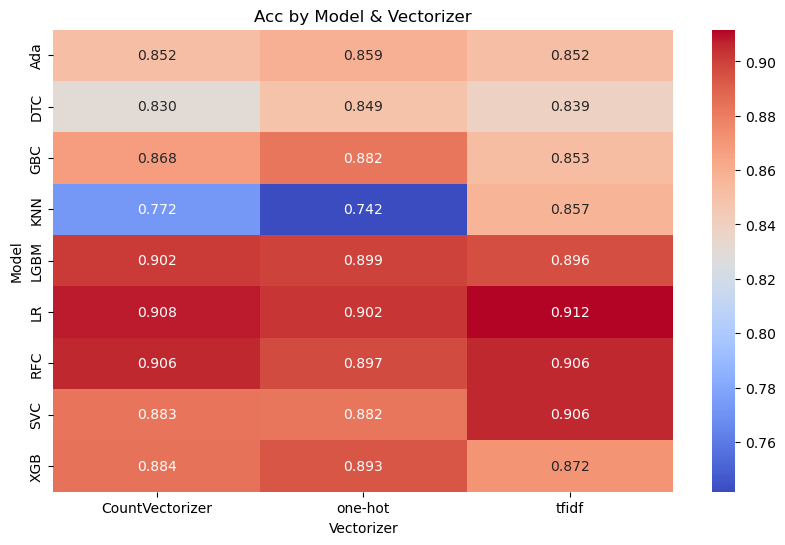

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 示例数据
data = {
    'name': ["KNN", "LR", "DTC", "SVC", "RFC", "Ada", "GBC", "XGB", "LGBM",
             "KNN", "LR", "DTC", "SVC", "RFC", "Ada", "GBC", "XGB", "LGBM",
             "KNN", "LR", "DTC", "SVC", "RFC", "Ada", "GBC", "XGB", "LGBM"],

    'acc': [0.7725, 0.9083333333333333, 0.83, 0.8833333333333333, 0.9058333333333334, 
                      0.8516666666666667, 0.8675, 0.8841666666666667, 0.9016666666666666,
                0.8566666666666667, 0.9116666666666666, 0.8391666666666666, 0.9058333333333334, 
                    0.9058333333333334, 0.8516666666666667, 0.8525, 0.8716666666666667, 0.8958333333333334,
                0.7416666666666667, 0.9025, 0.8491666666666666, 0.8825, 0.8966666666666666, 
                      0.8591666666666666, 0.8825, 0.8933333333333333, 0.8991666666666667],
    'vectorizer': [
                   'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer',
                   'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer',
                   'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf',
                   'one-hot', 'one-hot', 'one-hot', 'one-hot', 'one-hot', 'one-hot', 'one-hot', 'one-hot', 'one-hot']
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 创建一个透视表，用于存储不同模型在不同向量化器下的最佳得分
pivot_table = df.pivot_table(values='acc', index='name', columns='vectorizer')

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Acc by Model & Vectorizer')
plt.xlabel('Vectorizer')
plt.ylabel('Model')
plt.savefig('./images/ACC_by_Model_and_Vectorizer.png')
plt.show()